## Лабораторная работа 1
ИУ5-22М Румак Дарья
## Цель работы 
Изучение различных методов визуализация данных и создание истории на основе данных

## Задание
- Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
Для лабораторных работ не рекомендуется выбирать датасеты очень большого размера.
- Создать "историю о данных" в виде юпитер-ноутбука, с учетом следующих требований:
  1.	История должна содержать не менее 5 шагов (где 5 - рекомендуемое количество шагов). Каждый шаг содержит график и его текстовую интерпретацию.
  2.	На каждом шаге наряду с удачным итоговым графиком рекомендуется в юпитер-ноутбуке оставлять результаты предварительных "неудачных" графиков.
  3.	Не рекомендуется повторять виды графиков, желательно создать 5 графиков различных видов.
  4.	Выбор графиков должен быть обоснован использованием методологии data-to-viz. Рекомендуется учитывать типичные ошибки построения выбранного вида графика по методологии data-to-viz. Если методология Вами отвергается, то просьба обосновать Ваше решение по выбору графика.
  5.	История должна содержать итоговые выводы. В реальных "историях о данных" именно эти выводы представляют собой основную ценность для предприятия.
- Сформировать отчет и разместить его в своем репозитории на github.
Средства и способы визуализации данных можно посмотреть здесь.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [26]:
df = pd.read_csv("ds_salaries.csv")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [28]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [29]:
# Основные статистические характеристки набора данных
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [30]:
# Определим уникальные значения для целевого признака
df['salary_in_usd'].unique()

array([ 85847,  30000,  25500, ...,  28369, 412000,  94665], dtype=int64)

## Визуальное исследование датасета

Будем смотреть на основные задачи: анализ распределения зарплат, сравнение по уровням опыта и изучение влияния удалённой работы на зарплату. 

Для каждой задачи опишем, какой график рекомендуется, почему он подходит, а также какие альтернативы менее удачны и могут ввести в заблуждение.

## 1. Анализ распределения зарплат
Рекомендуемый график:

Гистограмма с наложенной KDE (плотность)

Почему именно этот график:

Зарплата в USD – это количественная переменная, и гистограмма позволяет увидеть форму распределения, наличие асимметрии и выбросов. Наложенная KDE (оценка плотности) помогает увидеть сглаженную кривую распределения, что полезно для обнаружения модальности (одномодальность, двучастность и т.д.).

Альтернативы и их недостатки:

Pie Chart (круговая диаграмма): Не подходит для количественных данных – она предназначена для категориальных переменных. Сравнение площадей или углов не даст точного понимания распределения.

Bar Chart (столбчатая диаграмма): Хорош для категорий, но для непрерывных данных он не передаст деталей распределения.

## Плотность зарплат по уровню опыта (kdeplot)

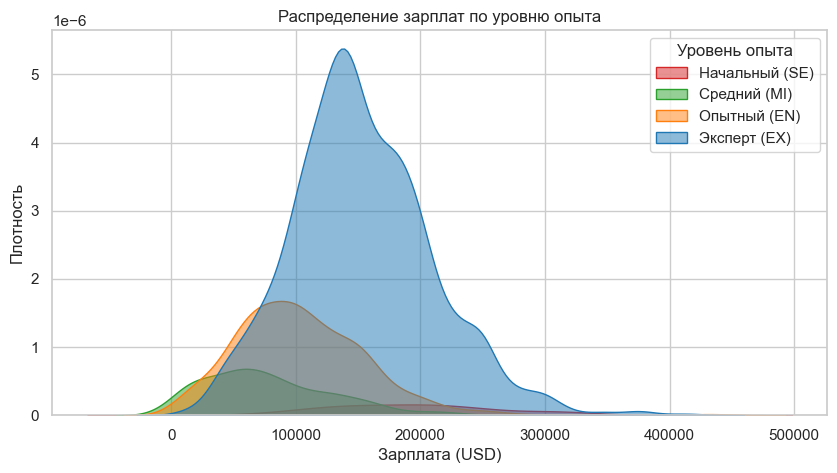

In [31]:
# Настройки графиков
sns.set(style="whitegrid")

# Определяем палитру цветов
experience_palette = {"SE": "#1f77b4", "MI": "#ff7f0e", "EN": "#2ca02c", "EX": "#d62728"}  # Подбери цвета под свои данные
employment_palette = {"FT": "#9467bd", "PT": "#8c564b", "CT": "#e377c2", "FL": "#7f7f7f"}

# Плотность зарплат по уровню опыта
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="salary_in_usd", hue="experience_level", fill=True, alpha=0.5, palette=experience_palette)
plt.title("Распределение зарплат по уровню опыта")
plt.xlabel("Зарплата (USD)")
plt.ylabel("Плотность")
plt.legend(title="Уровень опыта", labels=["Начальный (SE)", "Средний (MI)", "Опытный (EN)", "Эксперт (EX)"])
plt.show()

## Плотность зарплат по типу занятости (kdeplot)

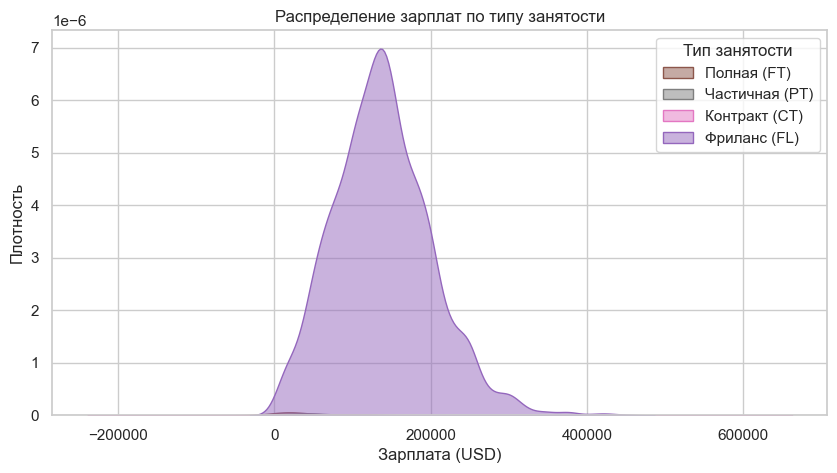

In [32]:
# Плотность зарплат по типу занятости
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="salary_in_usd", hue="employment_type", fill=True, alpha=0.5, palette=employment_palette)
plt.title("Распределение зарплат по типу занятости")
plt.xlabel("Зарплата (USD)")
plt.ylabel("Плотность")
plt.legend(title="Тип занятости", labels=["Полная (FT)", "Частичная (PT)", "Контракт (CT)", "Фриланс (FL)"])
plt.show()

## Гистограмма (histplot)

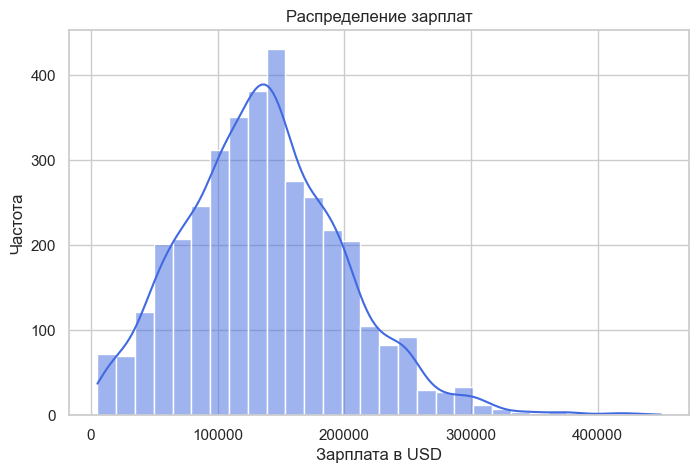

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['salary_in_usd'], bins=30, kde=True, color='royalblue')
plt.xlabel('Зарплата в USD')
plt.ylabel('Частота')
plt.title('Распределение зарплат')
plt.show()

## 2. Зависимость зарплаты от уровня опыта 

Рекомендуемый график:

Boxplot (ящик с усами). Boxplot (ящик с усами) – покажет медиану, разброс и выбросы зарплат для разных уровней опыта.

Почему именно этот график:

В датасете переменная experience_level является категориальной, а salary_in_usd – количественной. Boxplot позволяет сравнить медиану, квартили и выявить выбросы в каждой группе. Это помогает понять, как изменяется разброс зарплат в зависимости от уровня опыта.

Альтернативы и их недостатки:

Stacked Bar Chart (слоёная столбчатая диаграмма): Сложно показать распределение зарплат внутри категорий. Он даст лишь суммарную информацию, не показывая вариативность внутри группы.

Violin Plot: Мог бы дополнительно показать плотность распределения, но при небольшом количестве данных или сильном влиянии выбросов boxplot будет выглядеть более наглядно и привычно.

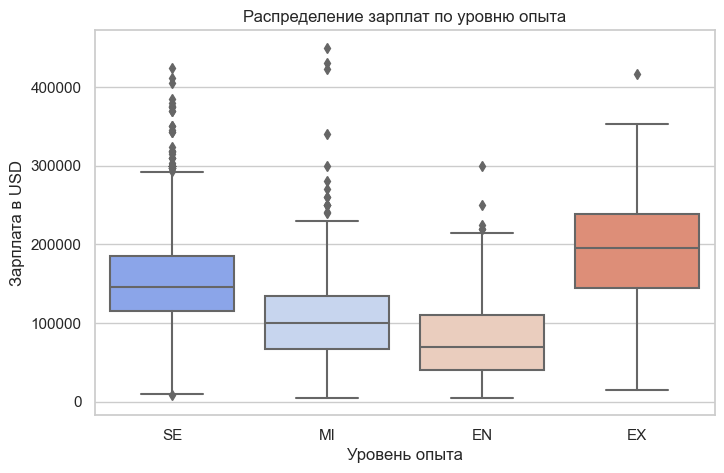

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette='coolwarm')
plt.xlabel('Уровень опыта')
plt.ylabel('Зарплата в USD')
plt.title('Распределение зарплат по уровню опыта')
plt.show()

## 3. Изучение влияния удалённой работы на зарплату

Определяем тип данных
У нас есть две переменные:

Удалённая работа (remote_ratio) – Категориальная (дискретная), потому что принимает 3 значения:

0 (Офис)

50 (Частично удалённо)

100 (Полностью удалённо)

Зарплата (salary_in_usd) – Числовая (непрерывная).


По дереву Data-to-Viz, если у нас есть категориальная переменная + числовая переменная, мы выбираем один из вариантов:

- Боксплот (Boxplot) – если хотим сравнить распределения

- Виолончельный график (Violin plot) – если хотим более детально показать распределение

- Плотностные графики (Density plot) – если хотим сравнить формы распределений

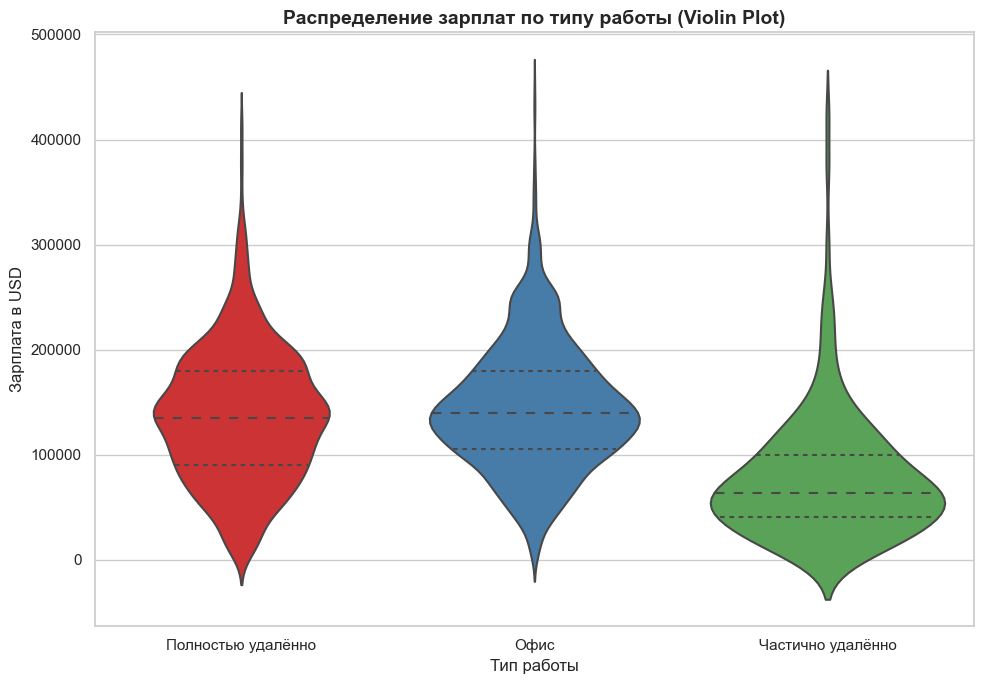

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные
df = pd.read_csv("ds_salaries.csv")

# Преобразуем 'remote_ratio' в категории
df["remote_ratio"] = df["remote_ratio"].map({0: "Офис", 50: "Частично удалённо", 100: "Полностью удалённо"})

# Устанавливаем стиль
sns.set_theme(style="whitegrid")

# Палитра цветов
palette = "Set1"  # Используем палитру Set1 для цветов

# Создаём фигуру для графиков (один график)
plt.figure(figsize=(10, 7))

# Виолончельный график (Violin Plot)
sns.violinplot(x="remote_ratio", y="salary_in_usd", data=df, palette=palette, inner="quartile")
plt.title("Распределение зарплат по типу работы (Violin Plot)", fontsize=14, fontweight="bold")
plt.xlabel("Тип работы", fontsize=12)
plt.ylabel("Зарплата в USD", fontsize=12)

# Показываем график
plt.tight_layout()
plt.show()

## Количество сотрудников по странам (company_location)
## 4. Столбчатая диаграмма количества сотрудников по странам
Что показывает: в каких странах находятся компании, представленные в датасете.
На что обратить внимание:

Если много редких стран, можно показывать только топ-10.

Учитывать возможные региональные различия в зарплатах.
📊 Bar Chart (столбчатая диаграмма) – покажет, в каких странах больше всего компаний.
⚠️ Ошибка: не сортировать категории, что затруднит анализ.

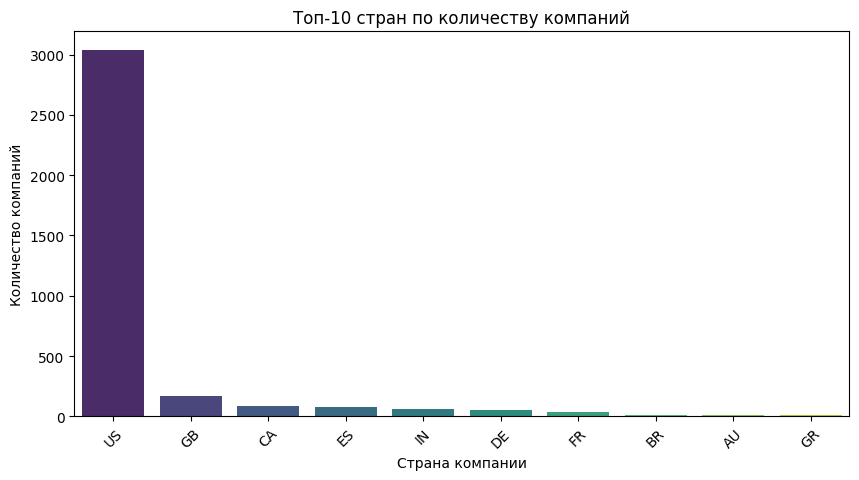

In [15]:
plt.figure(figsize=(10, 5))
top_countries = df['company_location'].value_counts().nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xlabel('Страна компании')
plt.ylabel('Количество компаний')
plt.title('Топ-10 стран по количеству компаний')
plt.xticks(rotation=45)
plt.show()

Эволюция средней зарплаты по годам (work_year)
Line Chart для трендов во времени
Когда использовать: Если интересует динамика изменения средней зарплаты по годам.

Почему: Линейный график хорошо показывает тренд и позволяет сравнить, как меняется показатель с течением времени.

Недостатки: Если данные сильно зашумлены, можно потерять детали, поэтому рекомендуется применять агрегирование (например, средние значения по годам).

📊 Line Chart (линейный график) – покажет тренды изменения зарплат.
⚠️ Ошибка: игнорировать инфляцию или валюту (нужно учитывать salary_in_usd).

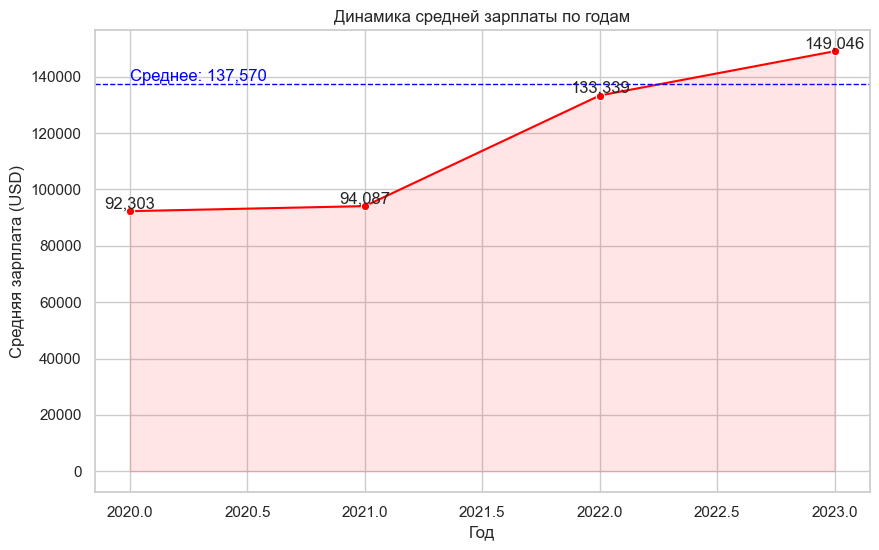

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv("ds_salaries.csv")

# Группировка данных по годам и вычисление средней зарплаты
salary_trend = df.groupby('work_year')['salary_in_usd'].mean()

# Построение графика
plt.figure(figsize=(10, 6))
sns.lineplot(x=salary_trend.index, y=salary_trend.values, marker='o', color='red')

# Добавление аннотаций для каждого значения
for year, salary in salary_trend.items():
    plt.text(year, salary, f'{salary:,.0f}', ha='center', va='bottom')

# Добавление горизонтальной линии среднего значения
overall_mean = df['salary_in_usd'].mean()
plt.axhline(overall_mean, color='blue', linestyle='--', linewidth=1)
plt.text(salary_trend.index.min(), overall_mean, f'Среднее: {overall_mean:,.0f}', color='blue', va='bottom')

# Заполнение области под графиком
plt.fill_between(salary_trend.index, salary_trend.values, color='red', alpha=0.1)

# Настройка подписей и заголовка
plt.xlabel('Год')
plt.ylabel('Средняя зарплата (USD)')
plt.title('Динамика средней зарплаты по годам')
plt.grid(True)
plt.show()


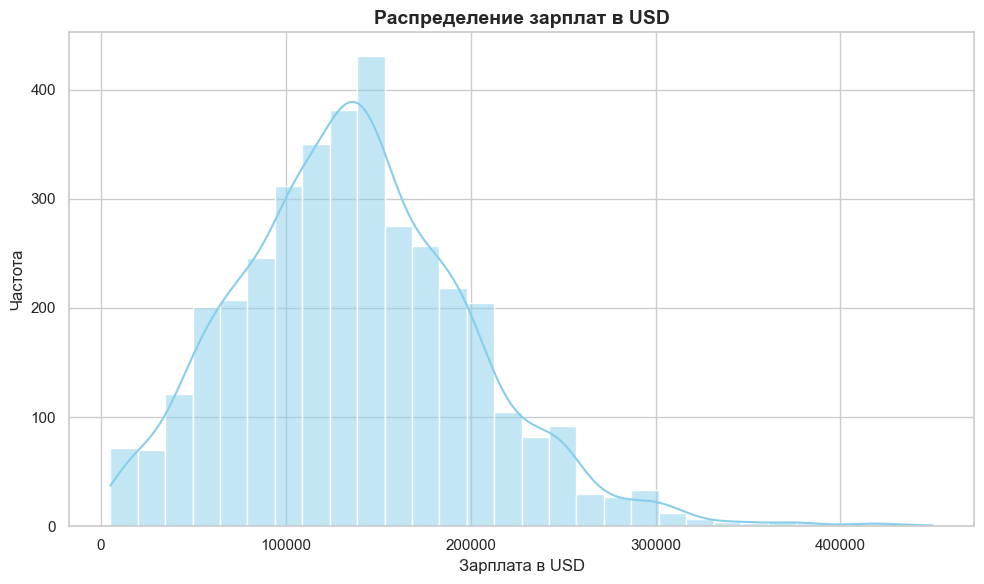

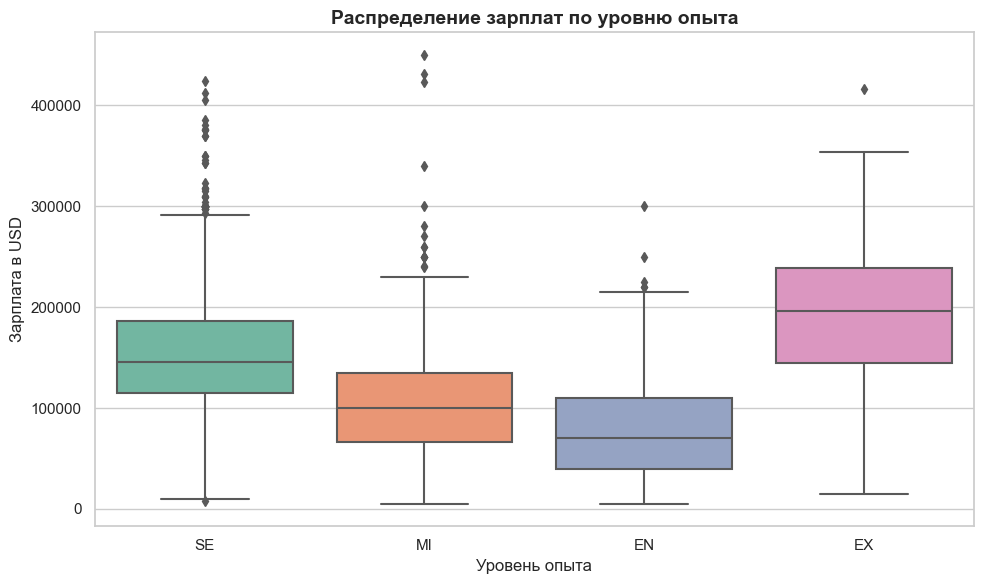

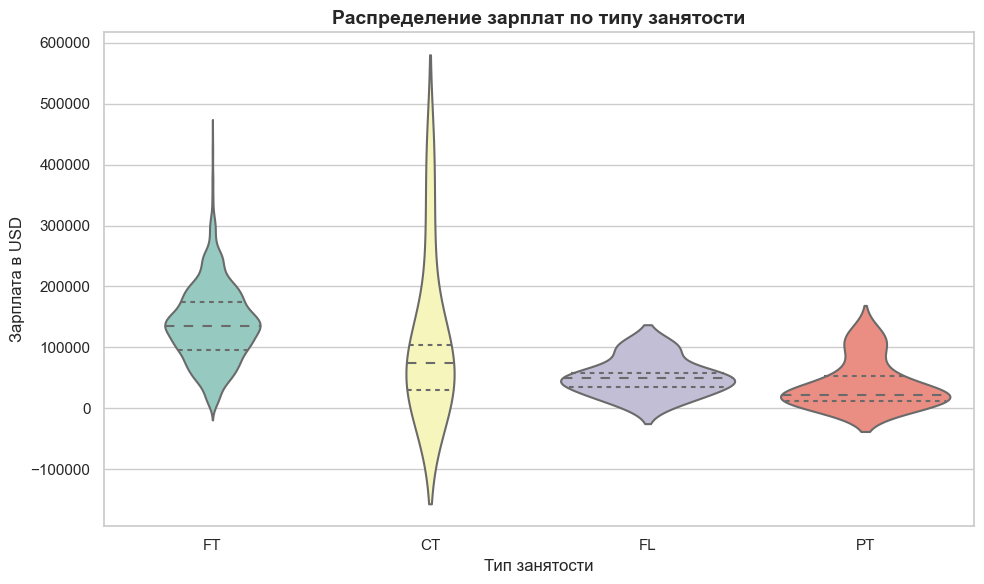

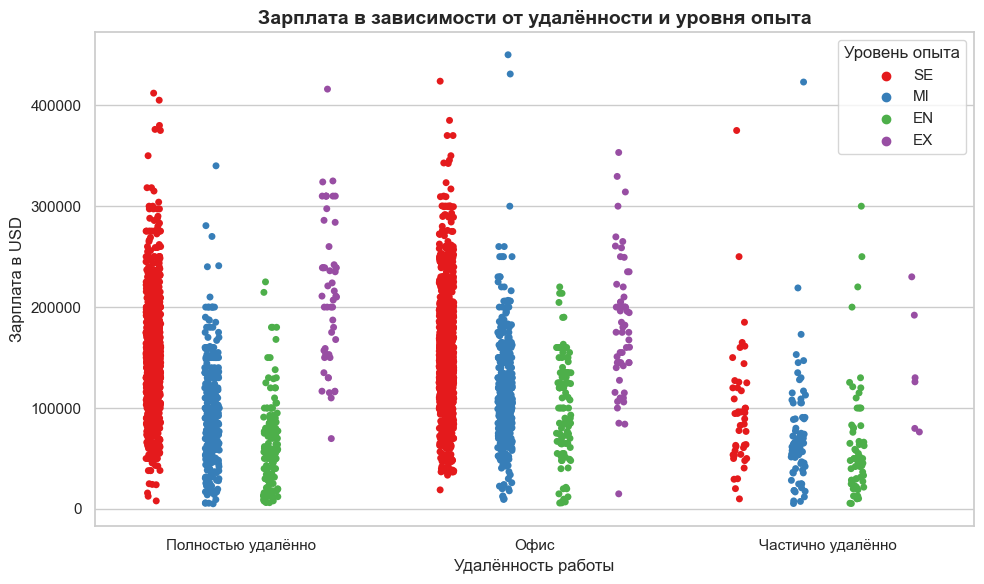

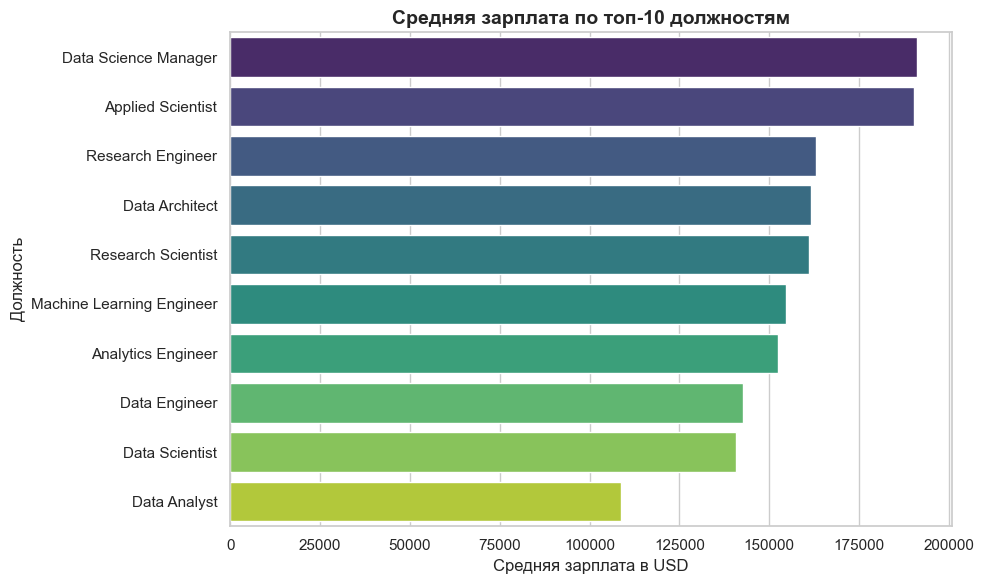

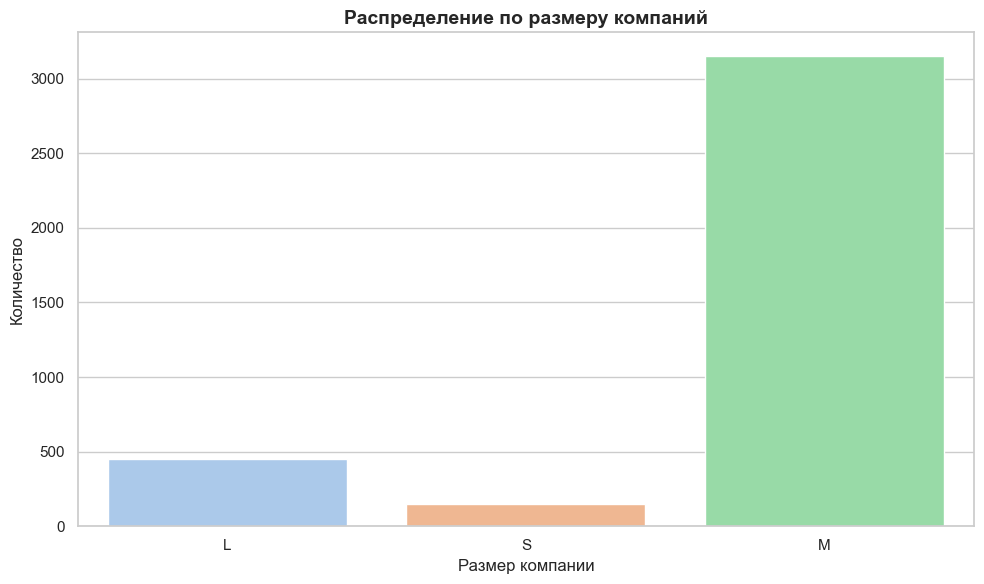

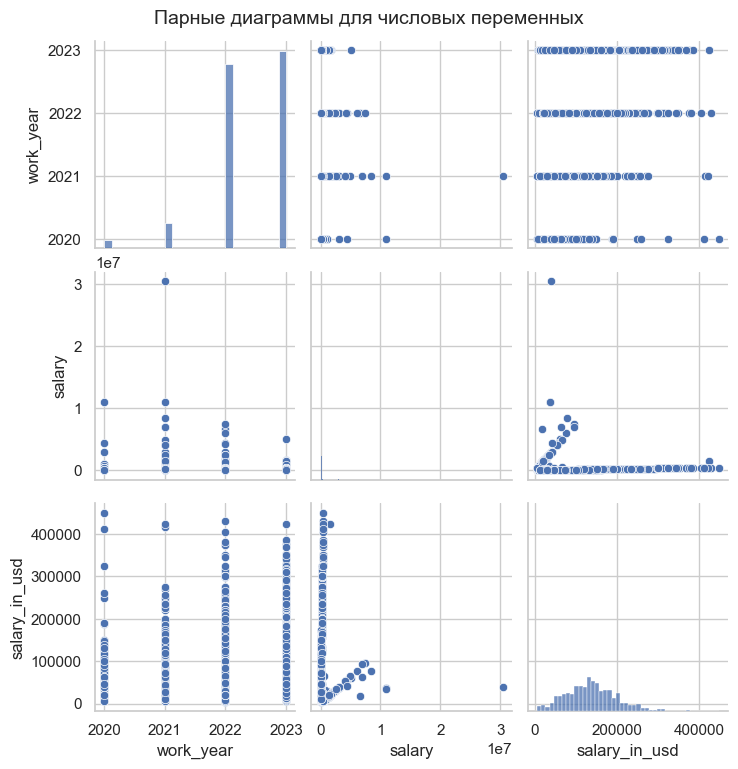

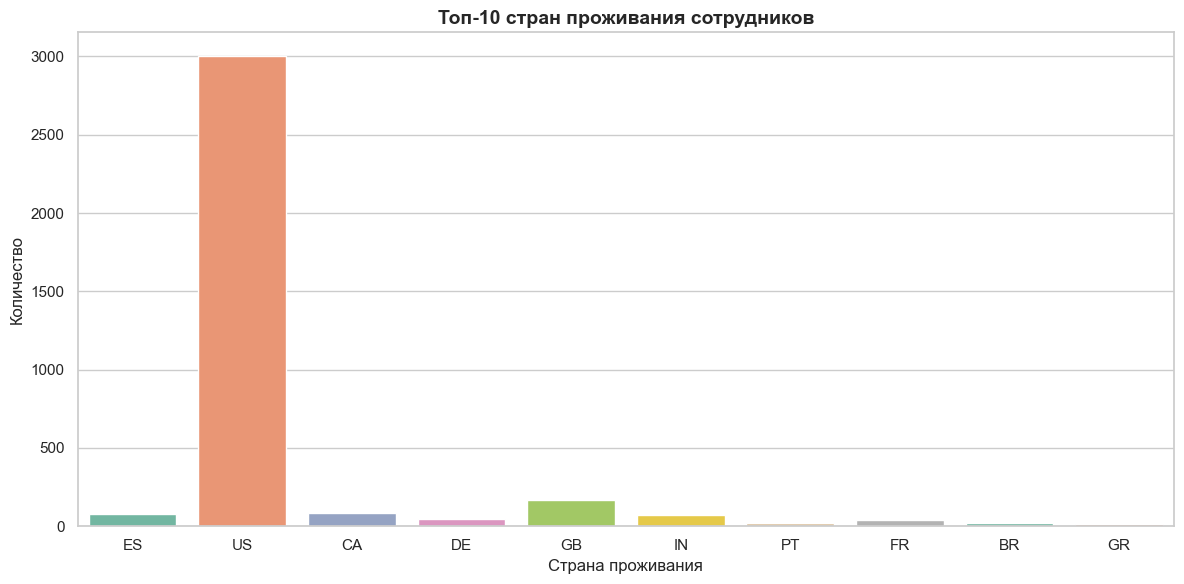

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные
df = pd.read_csv("ds_salaries.csv")

# Преобразуем переменные в категории
df["remote_ratio"] = df["remote_ratio"].map({0: "Офис", 50: "Частично удалённо", 100: "Полностью удалённо"})

# Устанавливаем стиль Seaborn
sns.set_theme(style="whitegrid")

###########################################################
# 1. Распределение зарплат (Histogram + KDE)
###########################################################
plt.figure(figsize=(10, 6))
sns.histplot(df["salary_in_usd"], bins=30, kde=True, color="skyblue")
plt.title("Распределение зарплат в USD", fontsize=14, fontweight="bold")
plt.xlabel("Зарплата в USD", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.tight_layout()
plt.show()

###########################################################
# 2. Boxplot: Зарплаты по уровню опыта (experience_level)
###########################################################
plt.figure(figsize=(10, 6))
sns.boxplot(x="experience_level", y="salary_in_usd", data=df, palette="Set2")
plt.title("Распределение зарплат по уровню опыта", fontsize=14, fontweight="bold")
plt.xlabel("Уровень опыта", fontsize=12)
plt.ylabel("Зарплата в USD", fontsize=12)
plt.tight_layout()
plt.show()

###########################################################
# 3. Violin Plot: Зарплаты по типу занятости (employment_type)
###########################################################
plt.figure(figsize=(10, 6))
sns.violinplot(x="employment_type", y="salary_in_usd", data=df, palette="Set3", inner="quartile")
plt.title("Распределение зарплат по типу занятости", fontsize=14, fontweight="bold")
plt.xlabel("Тип занятости", fontsize=12)
plt.ylabel("Зарплата в USD", fontsize=12)
plt.tight_layout()
plt.show()

###########################################################
# 4. Scatter/Strip Plot: Зарплата в зависимости от удалённости работы
#    (цвет – уровень опыта)
###########################################################
plt.figure(figsize=(10, 6))
sns.stripplot(x="remote_ratio", y="salary_in_usd", data=df, hue="experience_level",
              palette="Set1", jitter=True, dodge=True)
plt.title("Зарплата в зависимости от удалённости и уровня опыта", fontsize=14, fontweight="bold")
plt.xlabel("Удалённость работы", fontsize=12)
plt.ylabel("Зарплата в USD", fontsize=12)
plt.legend(title="Уровень опыта", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

###########################################################
# 5. Bar Plot: Средняя зарплата по топ-10 должностям (job_title)
###########################################################
# Выбираем топ-10 наиболее частых должностей
top_jobs = df["job_title"].value_counts().head(10).index
df_top = df[df["job_title"].isin(top_jobs)]
avg_salary_by_job = df_top.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_by_job.values, y=avg_salary_by_job.index, palette="viridis")
plt.title("Средняя зарплата по топ-10 должностям", fontsize=14, fontweight="bold")
plt.xlabel("Средняя зарплата в USD", fontsize=12)
plt.ylabel("Должность", fontsize=12)
plt.tight_layout()
plt.show()

###########################################################
# 6. Count Plot: Распределение по размеру компаний (company_size)
###########################################################
plt.figure(figsize=(10, 6))
sns.countplot(x="company_size", data=df, palette="pastel")
plt.title("Распределение по размеру компаний", fontsize=14, fontweight="bold")
plt.xlabel("Размер компании", fontsize=12)
plt.ylabel("Количество", fontsize=12)
plt.tight_layout()
plt.show()


###########################################################
# 8. Pairplot: Парные диаграммы для числовых переменных
###########################################################
sns.pairplot(df[numeric_cols])
plt.suptitle("Парные диаграммы для числовых переменных", y=1.02, fontsize=14)
plt.show()

###########################################################
# 9. Count Plot: Топ-10 стран проживания сотрудников (employee_residence)
###########################################################
plt.figure(figsize=(12, 6))
top_residences = df["employee_residence"].value_counts().head(10).index
sns.countplot(x="employee_residence", data=df[df["employee_residence"].isin(top_residences)], palette="Set2")
plt.title("Топ-10 стран проживания сотрудников", fontsize=14, fontweight="bold")
plt.xlabel("Страна проживания", fontsize=12)
plt.ylabel("Количество", fontsize=12)
plt.tight_layout()
plt.show()
